In [1]:
import pickle
import numpy as np
from pathlib import Path
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# path to where the data are on your machine
data_path = Path(r"C:\Users\marc_\OneDrive\Documents\Studie\Master\Master Internship 1 Neurophysics\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\data\20230211")

# File structure:
## trial_data.csv 
Trial matrix, readable as a pandas dataframe. Times are in indices, i.e. can be used directly to index arrays. For example, to access the position of the animal at the reward_zone_onset in trial 0, do:

position[trial_data.iloc[0]['reward_zone_onset']]
## behaviour_data.csv
Python dictionary with the following keys:
- time: times in seconds, used to match with neural data
- position: cumulative position of the animal on the threadmill
- lick_onsets: timestamps of lick onsets (in indices)
- lick_onffsets: timestamps of lick offsets (in indices)
- reward_onsets: timestamps of when the reward was give (in indices). It is the same information that can be found in the trial matrix, plus eventual rewards given to encourage the animal.
- reward_offsets: timestamps in indices
## neural_data.csv
Python dictionary with the following keys:
- traces: array with shape n_neurons x n_frames. activations of the neurons over time
- other things not needed for now
## parameters.yml
Parameters used to preprocess the data (not of interest for further analysis)

In [3]:
# visualize files in session folder
glob.glob(str(data_path)+'/*')

['C:\\Users\\marc_\\OneDrive\\Documents\\Studie\\Master\\Master Internship 1 Neurophysics\\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\\data\\20230211\\behaviour_data.pickle',
 'C:\\Users\\marc_\\OneDrive\\Documents\\Studie\\Master\\Master Internship 1 Neurophysics\\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\\data\\20230211\\neural_data.pickle',
 'C:\\Users\\marc_\\OneDrive\\Documents\\Studie\\Master\\Master Internship 1 Neurophysics\\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\\data\\20230211\\parameters.yml',
 'C:\\Users\\marc_\\OneDrive\\Documents\\Studie\\Master\\Master Internship 1 Neurophysics\\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\\data\\20230211\\trial_data.csv']

# Trial matrix
the trial matrix is in a .csv file. The structure is the same as before, with 2 exceptions:
- 'trial_duration' is not calculated (can be calculated as tunnel2_offset-env_onset)
- there is no 'clean_trial' label anymore

In [4]:
trial_data_file = data_path.joinpath('trial_data.csv')
trial_data = pd.read_csv(trial_data_file)
trial_data

,env_onset,tunnel1_onset,reward_zone_onset,tunnel2_onset,tunnel2_offset,trial_duration,env_label,sound_onset,sound_offset,sound_presented,reward_onset,reward_offset
0,0.0,51742,62734,84207,87311,NaN,1,48182.0,163347.0,True,63550,66561
1,87311.0,117556,120011,154259,158038,NaN,3,NaN,NaN,False,121313,124339
2,158038.0,172831,213693,242507,244749,NaN,1,166359.0,257770.0,True,231849,234863
3,244749.0,266401,269199,339747,342111,NaN,2,260775.0,363012.0,True,270289,273308
4,342111.0,372283,382112,388546,396273,NaN,1,366022.0,399709.0,True,383091,386109
5,396273.0,413147,415210,436766,437438,NaN,2,402721.0,449813.0,True,415977,418985
6,437438.0,459485,462992,471835,474908,NaN,1,452816.0,481899.0,True,464101,467108
7,474908.0,526669,539910,611337,614135,NaN,3,484920.0,617838.0,True,541697,544704
8,614135.0,665133,667664,683879,684559,NaN,3,620845.0,688756.0,True,668392,671403
9,684559.0,696625,700692,720849,724404,NaN,2,691767.0,741830.0,True,702266,705266


# Behavioural data

In [5]:
bdata_file = data_path.joinpath('behaviour_data.pickle')
with open(bdata_file,'rb') as file:
    b_data = pickle.load(file)

In [6]:
for k in b_data.keys():
    print(f'{k} with shape: {b_data[k].shape}')

time with shape: (2813328,)
position with shape: (2813328,)
lick_onsets with shape: (3516,)
lick_offsets with shape: (3517,)
reward_onsets with shape: (40,)
reward_offsets with shape: (40,)


# Neural data

In [7]:
ndata_file = data_path.joinpath('neural_data.pickle')
with open(ndata_file,'rb') as file:
    n_data = pickle.load(file)

In [8]:
for k in n_data.keys():
    if type(n_data[k])==np.ndarray:
        print(f'{k}-> array with shape: {n_data[k].shape}')
    else:
        print(f'{k}-> list with len {len(n_data[k])}')

traces-> array with shape: (355, 83737)
footprints-> array with shape: (490, 490, 355)
df_f-> array with shape: (355, 83737)
deconvolved-> list with len 355
positions-> array with shape: (355, 2)
contour-> list with len 355


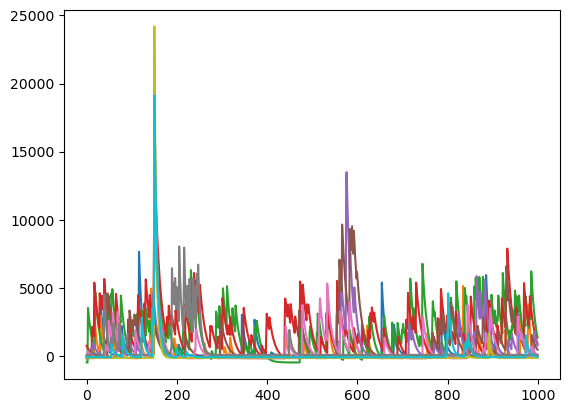

In [9]:
for i in range(10):
    plt.plot(n_data['traces'][i,:1000])

# Plan (goal 1):
1. isolate the reward presentation for each trial. Find the number of licks that happened between the reward presentation and two seconds (2000 frames) after.
2. use eventplot to plot the licks for each trial on the same plot (x axis: time, y axis: trial)

This will tell us if there is a change in licking patterns during the course of the trial

In [10]:
# calculating some values needed to find the number of licks
trial_duration  = trial_data['tunnel2_offset'] - trial_data['env_onset'] # full trial duration

# define the time frame during the trial in which the reward was presented and licks are part of the desired behaviour
lick_start = trial_data['reward_onset']
lick_end = trial_data['reward_onset'] + 2000

# numpy array of the number of licks during the lick time
licks = b_data['lick_onsets'] 

# init the lick counter
lick_counter = 0 

# iterate through each row in the dataframe
for i in range(len(lick_start)):
    # check if the values fall within the range
    for lick in licks:
        if lick_start[i] <= lick <= lick_end[i]:
            lick_counter += 1
print(lick_counter)

# compute the fraction of licks that happen at the reward_onset
reward_licks = lick_counter/len(licks) * 100
print(reward_licks)

200
5.688282138794084


# Function: lick_counter

In [15]:
# import numpy as np
def lick_counter(trial_duration, lick_start, lick_end, licks):
    """
    Counts the number of licks that occur during a specified time window and calculates the fraction of licks that 
    occur at the reward onset time.
    
    PARAMETERS:
        trial_duration (float): The duration of the trial in seconds.
        lick_start (int): The timepoint at which the reward was presented.
        lick_end (int): The timepoint at which the reward window ends.
        licks (numpy array): A numpy array of shape (m,) containing the timepoints at which licks occurred.
    
    RETURNS:
        tuple: A tuple containing the lick count and fraction of licks at the reward onset time.
    """
    
    # initialize the lick counter
    lick_counter = 0 
    
    # iterate through each row in the dataframe
    for i in range(len(lick_start)):
        # check if the lick time falls within the reward window
        for lick in licks:
            if lick_start[i] <= lick <= lick_end[i]:
                lick_counter += 1
    
    # compute the fraction of licks that occur at the reward onset time
    reward_licks = lick_counter / len(licks) * 100
    
    return lick_counter, reward_licks

In [16]:
# call the function and print the results
lick_count, reward_fraction = lick_counter(trial_duration, lick_start, lick_end, licks)
print("Number of licks during reward window:", lick_count)
print("Fraction of licks at reward onset:", reward_fraction)

Number of licks during reward window: 200
Fraction of licks at reward onset: 5.688282138794084


200
0.05688282138794084


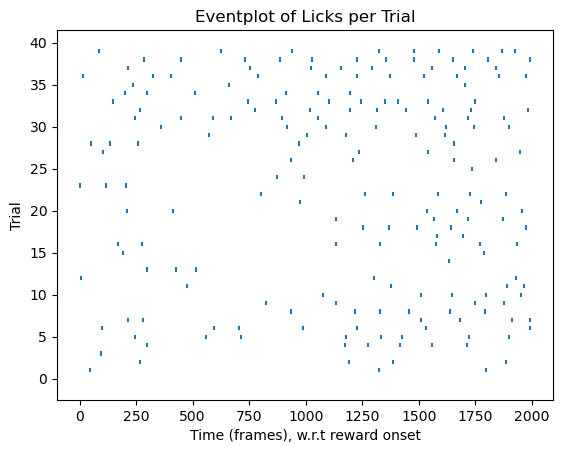

In [13]:
# Calculating some values needed to find the number of licks.
trial_duration  = trial_data['tunnel2_offset'] - trial_data['env_onset'] # full trial duration

# Define the time frame during the trial in which the reward was presented and licks are part of the desired behaviour.
lick_start = trial_data['reward_onset']
lick_end = trial_data['reward_onset'] + 2000

# Numpy array of the number of licks during the lick time.
licks = b_data['lick_onsets'] 

# Init the lick counter.
lick_counter = 0

# Init list of reward licks.
reward_licks_list = []

# Iterate through each row in the dataframe.
for i in range(len(lick_start)):

    # Init list for adding the licks at the reward zone onset.
    trial_reward_licks = []
    # Check if the values fall within the range.
    for lick in licks:
        if lick_start[i] <= lick <= lick_end[i]:
            lick_counter += 1
            relative_lick_time = lick - lick_start[i] # Lick time with respect to reward onset.
            trial_reward_licks.append(relative_lick_time)

    # Append the list of licks of the trial to the general list, the general list will be a list of lists.
    reward_licks_list.append(trial_reward_licks)
print(lick_counter)

# Compute the fraction of licks that happen at the reward_onset.
reward_licks = lick_counter/len(licks)
print(reward_licks)

# Create the eventplot.
plt.eventplot(reward_licks_list, lineoffsets=1, linelengths=0.5)

# Add axis labels and title.
plt.xlabel('Time (frames), w.r.t reward onset')
plt.ylabel('Trial')
plt.title('Eventplot of Licks per Trial')

# Show the plot.
plt.show()

# Plan (goal 2):
1. extract the position timecourse in the environment of each trial (betwen env_onset and tunnel1_onset).
2. normalize the position between 0 and 1: norm_pos = (pos-min(pos))/(max(pos)-min(pos))
3. concatenate all trial positions together compute the histogram of positions across the whole session
4. numpy histogram function

This will tell us if there is a tendency from the animal to prefer parts of the environment, and will be useful down the line when we compute place cells

See histogram_code.ipynb for continuation